## Simulation of the Brownian motion

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from scipy.stats import norm

## 1- Forward simulation

## 1-a) justify 

Grâce à la propriété du brownien qui stipule que le brownien est d'accroissement gaussien centré de variance la diffenfe des temps; ici $$ \sqrt{\delta} $$, on peut verifier cette question

## 1-b) simulation

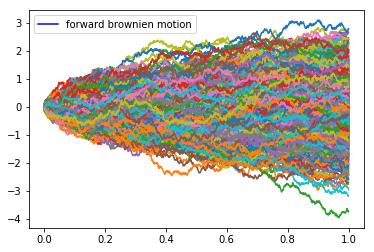

In [52]:
T=1
n=10
M=1000
pas = (2**(-n))*T
intergration = np.linspace(0,T,2**n)
echantillon=np.random.normal(0,np.sqrt(pas), size=(M,2**n))

trajectoires=np.cumsum(echantillon, axis=1)

fig = plt.figure()
ax = fig.add_subplot(111)


ax.plot(intergration,trajectoires[0], color="b", label="forward brownien motion")
for i in range(M):
    ax.plot(intergration, trajectoires[i])

ax.legend(loc="best")
plt.show()

## 1-c) Compute the corresponding sample mean and variance of WT , and the sample covariance of (WT , WT /2).

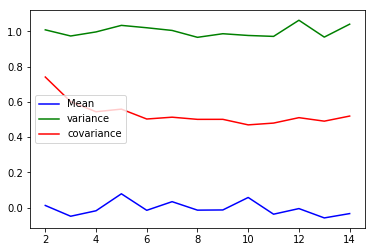

In [53]:
Mean_WT=[]
Variance_WT =[]
cov_WT_WT_2= []
for n in range(2,15):
    pas = (2**(-n))*T
    N = int(2**(n-1))
    intergration = np.linspace(0,T,2*N)
    echantillon=np.random.normal(0,np.sqrt(pas), size=(M,2*N))

    trajectoires=np.cumsum(echantillon, axis=1)
    Mean_WT.append(np.mean( trajectoires[:,-1] ))
    Variance_WT.append( np.var( trajectoires[:,-1]))
    Esp_gWT=0.0
    var=1.0
    cov_WT_WT_2.append((np.var(trajectoires[:,-1]+trajectoires[:,N])- np.var(trajectoires[:,-1])-np.var(trajectoires[:,N]))/2)

plt.plot(range(2,15),Mean_WT, color="b", label="Mean")
plt.plot(range(2,15),Variance_WT, color="g", label="variance")
plt.plot(range(2,15),cov_WT_WT_2, color="r", label="covariance")
plt.legend()
plt.show()

We have a convergence towards the characteristic values when n becomes larger and larger

## 2- Backward simulation

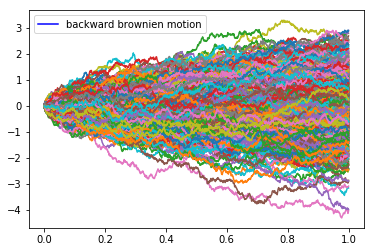

In [54]:
def WSbar(s1,s2,x1,x2):
    return np.random.normal((x1+x2)/2,np.sqrt((s2-s1)/4))


def MBsample(echantillon):
    echantillons = [0] 
    for i in range(len(echantillon)-1):
        echantillons.append(WSbar(i/(len(echantillon)-1),(i+1)/(len(echantillon)-1),echantillon[i],echantillon[i+1]))
        echantillons.append(echantillon[i+1])
    return echantillons


def Sample(T,n):
    echantillon = [0,np.random.normal(0,np.sqrt(T))]
    while(len(echantillon)< 2**n):
        echantillon = MBsample(echantillon)
    return echantillon

T=1
n=10
M=1000
pas = (2**(-n))*T
intergration = np.linspace(0,T,2**n+1)
trajectoires=[]
for i in range(M):
    echantillon = Sample(T,n)
    trajectoires.append(echantillon)

trajectoires=np.array(trajectoires)

fig = plt.figure()
ax = fig.add_subplot(111)


ax.plot(intergration,trajectoires[0], color="b", label="backward brownien motion")
for i in range(M):
    ax.plot(intergration, trajectoires[i])

ax.legend(loc="best")
plt.show()

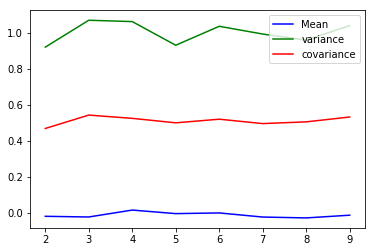

In [55]:
Mean_WT=[]
Variance_WT =[]
cov_WT_WT_2= []
for n in range(2,10):
    pas = (2**(-n))*T
    N = int(2**(n-1))
    intergration = np.linspace(0,T,2*N+1)
    trajectoires=[]
    for i in range(M):
        echantillon = Sample(T,n)
        trajectoires.append(echantillon)

    trajectoires=np.array(trajectoires)
    #print(len(trajectoires[i]))

    Mean_WT.append(np.mean( trajectoires[:,-1] ))
    Variance_WT.append( np.var( trajectoires[:,-1]))
    Esp_gWT=0.0
    var=1.0
    cov_WT_WT_2.append((np.var(trajectoires[:,-1]+trajectoires[:,N])- np.var(trajectoires[:,-1])-np.var(trajectoires[:,N]))/2)

plt.plot(range(2,10),Mean_WT, color="b", label="Mean")
plt.plot(range(2,10),Variance_WT, color="g", label="variance")
plt.plot(range(2,10),cov_WT_WT_2, color="r", label="covariance")
plt.legend()
plt.show()

We do have a convergence towards the characteristic values when n becomes larger and larger but this time it is finer than the forward method

## 3- Compute an approximation of QVn (W)

In [58]:
def variationQ(trajectoire):
    q=0
    for i in range(1,len(trajectoire)):
        q+=(trajectoire[i]-trajectoire[i-1])**2
    return q

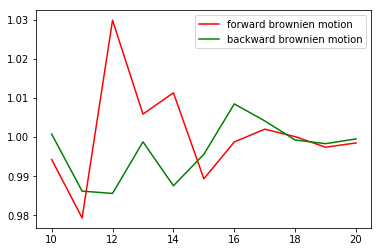

In [67]:
ens=[i for i in range(10,21)]
M=1
VQfw = []
VQbw = []
for n in ens :
    pas = (2**(-n))*T
    N = int(2**(n-1))
    intergration = np.linspace(0,T,2*N)
    echantillon=np.random.normal(0,np.sqrt(pas), size=(1,2*N))

    trajectoiresforward = np.cumsum(echantillon, axis=1)
    trajectoiresbackward = Sample(T,n)
    
    VQfw.append(variationQ(trajectoiresforward[0]))
    VQbw.append(variationQ(trajectoiresbackward))
    


fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(ens, VQfw,color = "r", label="forward brownien motion")
plt.legend(loc="best")

plt.plot(ens, VQbw, color= "g", label="backward brownien motion")
plt.legend(loc="best")

plt.show()

The convergence of the quadratic variation is clearly visible on both graphs